# 绘图与可视化

In [1]:
import numpy as np
import pandas as pd
import datetime

datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2021-04-10 21:53:25'

# 为什么要使用Python进行数据分析

![编程语言排行榜](./language_top.png)来源(https://www.tiobe.com/tiobe-index/)

- 商业统计语言如 SAS，Stata 和 SPSS 的软件的时代已经过去， 大学和研究机构开始采用 Python 和 R 进行统计分析。
- Python作为胶水语言
- 解决“两种语言”问题
- 数据分析重要的Python库
     - NumPy、pandas、matplotlib、IPython和Jupyter、SciPy、scikit-learn、statsmodels

# Matplotlib简介

matplotlib是Python编程语言及其数值数学扩展包 NumPy的可视化操作界面。它利用通用的图形用户界面工具包，如Tkinter, wxPython, Qt或GTK+，向应用程序嵌入式绘图提供了应用程序接口（API）。此外，matplotlib还有一个基于图像处理库（如开放图形库OpenGL）的pylab接口，其设计与MATLAB非常类似。SciPy就是用matplotlib进行图形绘制。

matplotlib最初由John D. Hunter撰写，它拥有一个活跃的开发社区，并且根据BSD样式许可证分发。 在John D. Hunter2012年去世前不久，Michael Droettboom被提名为matplotlib的主要开发者。

# 一个简单的例子

In [2]:
# 引入matplotlib库
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

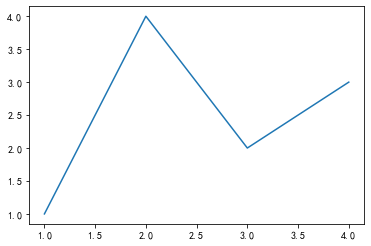

In [3]:
fig, ax = plt.subplots()  # 创建一个包含一个坐标系的画布
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # 在坐标系上画出数据
plt.show()

# 图的组成元素

![绘图元素](./people_draw.jpg)

在matplotlib中，图由以下基本元素组成：

- Figure对象 画布
- Axes对象 坐标系 / Subplot子图
- Axis对象 坐标轴
- Artist对象 基本元素



绘图流程基本流程：

1. 创建Figure对象
2. Fgure对象创建一个或多个Axes对象
3. Axes对象的方法来创建各种简单的Artist对象

# 两种绘图方式

matplotlib绘图时，有2种常用的方式，
- 一种是显式创建画布和坐标系对象，然后调用它们方法进行画图（面向对象风格）
- 另外一种是直接使用```pyplot.plot()```函数自动的创建和管理画布、坐标系对象（```pyplot.plot()```函数风格）

## 方式一：面向对象风格，显式依次创建画布->在画布上创建坐标系->在坐标系上画图（推荐）

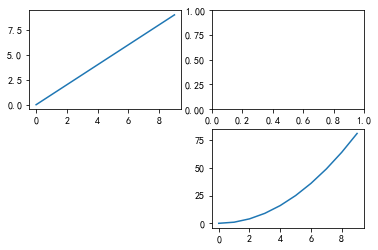

In [4]:
fig = plt.figure()  # 创建画布
ax1 = fig.add_subplot(2, 2, 1)  # 在画布上创建坐标系
ax2 = fig.add_subplot(2, 2, 2)  # 在画布上创建坐标系
ax4 = fig.add_subplot(2, 2, 4)  # 在画布上创建坐标系
ax1.plot(np.arange(10))  # 在坐标系上画图
ax4.plot(np.arange(10), np.arange(10) ** 2)  # 在坐标系上画图
plt.show()

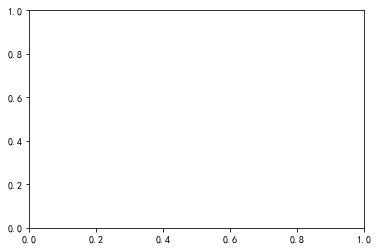

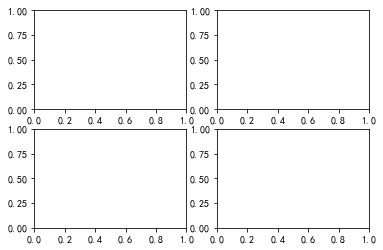

In [5]:
fig1, ax = plt.subplots()  # 创建含有1个坐标系的画布
plt.show()
fig2, axs = plt.subplots(2, 2)  # 创建含有2*2个坐标系的画布
plt.show()

## 方式二：```pyplot.plot()```函数风格，不显式创建画布、坐标系，直接画图（不推荐）

python matplotlib库是从MATLIB启发而来，所以在设计上保留了许多类似MATLIB风格的交互式接口，```pyplot.plot()```正是其中一个。

当没有显示指定坐标系，直接使用```pyplot.plot()```接口画图时，matplotlib就会在最后一个用过的坐标系画图（如果没有就自动创建一个）。

当前Figure画布对象ID: 2448908959264
当前Axes坐标系对象ID: 2448908424768


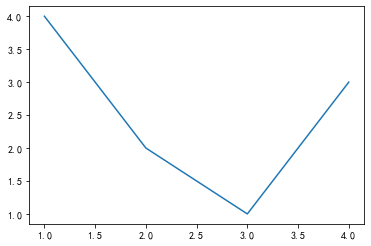

In [6]:
plt.plot([1, 2, 3, 4], [4, 2, 1, 3])
print("当前Figure画布对象ID:", id(plt.gcf()))
print("当前Axes坐标系对象ID:", id(plt.gca()))

当前Figure画布对象ID: 2448909144656
当前Axes坐标系对象ID: 2448909146384


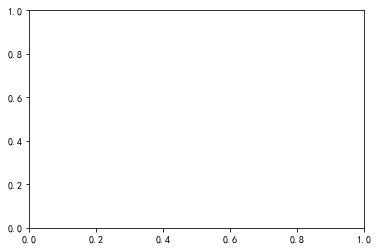

In [7]:
print("当前Figure画布对象ID:", id(plt.gcf()))
print("当前Axes坐标系对象ID:", id(plt.gca()))

## 小结

- 以```pyplot.plot()```为代表的函数式操作，表达简洁，但是没有体现出真正画图的实现过程，例如甚至当没有搞清楚Figure Axes Subplot 等概念的时候，依然可以轻松的用pyplot函数画图。当子图较多的时候，对子图的操作容易陷入混乱，因为从代码上并不能直接观察出到底在操作那张子图。
- 以 ```.plot```为代表的对象式操作，表达明确，分步生成 Figure 和 Axes/Subplot，操作过程直接可以看出是在那张子图上操作。但是缺点就是，需要写的代码比较多，不够简洁。
- 还是看使用场景，假如不需要画子图的时候，用一用简单的pyplot方法也没什么不好。但是初学者最好还是能够坚持先使用Axes对象属性的方法，这样对于画图的实现过程可以加深理解。

# 后端渲染

## matplotlib绘图场景:
- python shell 处理数据
- 图形应用程序用以展示数据
- jupyter用户交互式数据分析
- Web后台服务器批量生成动态数据图片等

## matplotlib拥有多种后端，能轻松处理以上场景：

- 交付式后端：应用于PyQt/PySide, PyGObject, Tkinter, wxPython, macOS/Cocoa 等程序中
- 非交互式后端：用于生成图片文件(PNG, SVG, PDF, PS等)

## 设置matplotlib后端的三种方法：
- 在matplotlibrc文件中设置rcParams["backend"]参数
- 设置MPLBACKEND环境变量
- 使用matplotlib.use()韩式

## jupyter notebook 中使用
```
%matplotlib inline 
```
jupyter魔法函数，设置matpplotlib后端为```inline```。

jupyter中的```inline```后端支持matplotlib画图后直接自动显示图像，不用再额外执行```plt.show()```

In [8]:
%matplotlib inline

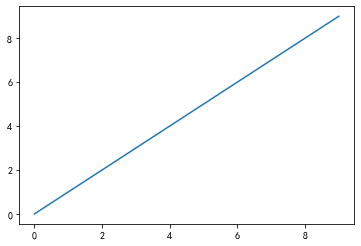

In [9]:
plt.plot(range(10))

# plot绘图函数详解

Axes对象的plot()方法比 [pyplot.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)函数在参数上更为灵活，pyplot.plot()的调用参数用法一般也适用于 Axes对象的plot()方法。


```
fmt = '[marker][line][color]'

plot([x], y, [fmt], *, data=None, **kwargs) # 参数格式
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs) # 参数格式

调用示例：
>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)
```

![绘图元素](https://matplotlib.org/stable/_images/anatomy.png)

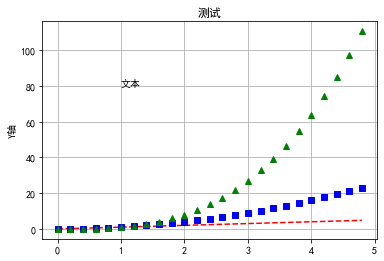

In [10]:
t = np.arange(0.0, 5.0, 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, "r--", t, t ** 2, "bs", t, t ** 3, "g^")  # fmt = '[marker][line][color]'
plt.title("测试")
plt.ylabel("Y轴")
plt.text(1, 80, r"文本")
plt.grid(True)
plt.show()

# 一些入门例子

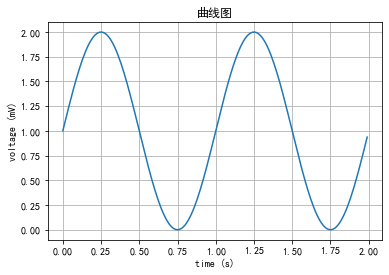

In [11]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel="time (s)", ylabel="voltage (mV)", title="曲线图")
ax.grid()
plt.show()

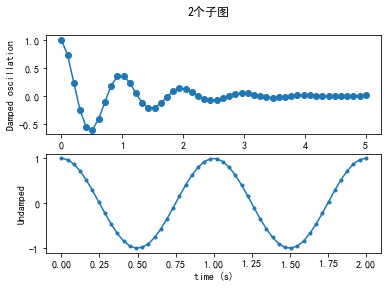

In [12]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("2个子图")

ax1.plot(x1, y1, "o-")
ax1.set_ylabel("Damped oscillation")

ax2.plot(x2, y2, ".-")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("Undamped")

plt.show()

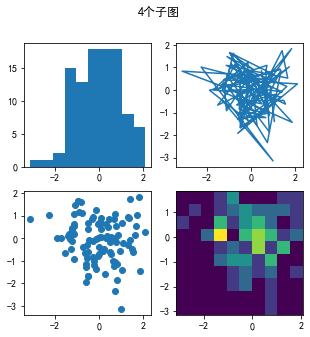

In [13]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])
fig.suptitle("4个子图")
plt.show()

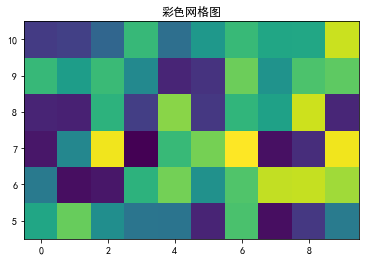

In [14]:
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)
ax.set_title("彩色网格图")
plt.show()

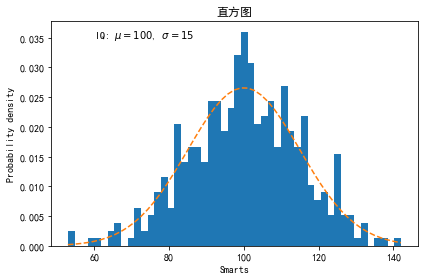

In [15]:
# API doc: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
np.random.seed(19680801)
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)
num_bins = 50
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)
# add a 'best fit' line
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu)) ** 2)
ax.plot(bins, y, "--")
ax.set_xlabel("Smarts")
ax.set_ylabel("Probability density")
ax.set_title("直方图")
ax.text(60, 0.035, r"IQ: $\mu=100$, $\sigma=15$")
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

![](./example.png)

# 现有工作中常用到的例子

## 建模数据准备

In [16]:
pd.read_excel("./data_dict.xls")  # 样本数据字典

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [17]:
data = pd.read_csv("cs-training.csv", index_col=0)  # 样本数据

In [18]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [19]:
data.SeriousDlqin2yrs.value_counts()  # 样本Y值分布

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [20]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import toad

In [22]:
# 样本划分
train, test = train_test_split(data, test_size=1 / 3, random_state=42)
train.shape, test.shape

((100000, 11), (50000, 11))

In [23]:
# 决策树分箱 Fit
combiner = toad.transform.Combiner()
combiner.fit(
    train, y="SeriousDlqin2yrs", method="dt"
)  # method: 'dt', 'chi', 'quantile', 'step', 'kmeans'

In [24]:
# WOE Fit
transer = toad.transform.WOETransformer()
transer.fit(combiner.transform(train, y="SeriousDlqin2yrs"), y="SeriousDlqin2yrs")

In [25]:
# WOE
train_woe = transer.transform(combiner.transform(train))
test_woe = transer.transform(combiner.transform(test))
train_woe.shape, test_woe.shape

((100000, 11), (50000, 11))

In [26]:
# LR 拟合
model = LogisticRegression()
X = train_woe.drop(columns="SeriousDlqin2yrs")
y = train_woe["SeriousDlqin2yrs"]
model.fit(X, y)
pred_y = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, pred_y, pos_label=1, drop_intermediate=True)
print("ks: %.2f" % max(abs(fpr - tpr)))

ks: 0.55


## 建模绘图

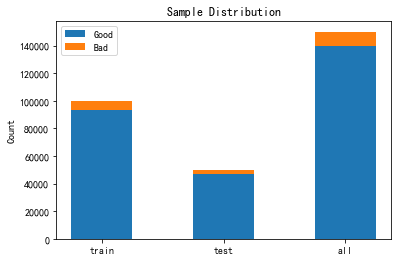

In [27]:
# ------------------------Sample Distribution------------------------#
# 数据准备
labels = ["train", "test", "all"]
goods = [
    (train["SeriousDlqin2yrs"] == 0).sum(),
    (test["SeriousDlqin2yrs"] == 0).sum(),
    (data["SeriousDlqin2yrs"] == 0).sum(),
]
bads = [
    (train["SeriousDlqin2yrs"] == 1).sum(),
    (test["SeriousDlqin2yrs"] == 1).sum(),
    (data["SeriousDlqin2yrs"] == 1).sum(),
]
width = 0.5
# 绘图
fig, ax = plt.subplots()
ax.bar(
    labels,
    goods,
    width=width,
    label="Good",
)
ax.bar(labels, bads, width=width, label="Bad", bottom=goods)
ax.set_ylabel("Count")
ax.set_title("Sample Distribution")
ax.legend()
plt.show()

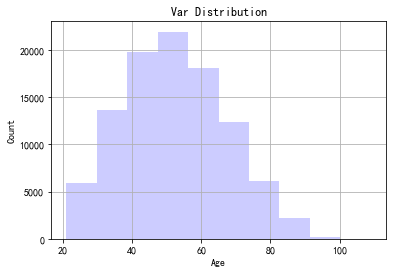

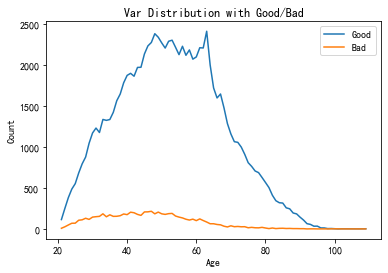

In [28]:
# ------------------------Variable Distribution------------------------#
# 绘图
fig, ax = plt.subplots()
ax.hist(train["age"], color="#CCCCFF")
ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Var Distribution")
plt.show()
# 绘图
ax = pd.crosstab(train["age"], train["SeriousDlqin2yrs"]).plot()
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.legend(["Good", "Bad"])
ax.set_title("Var Distribution with Good/Bad")
plt.show()

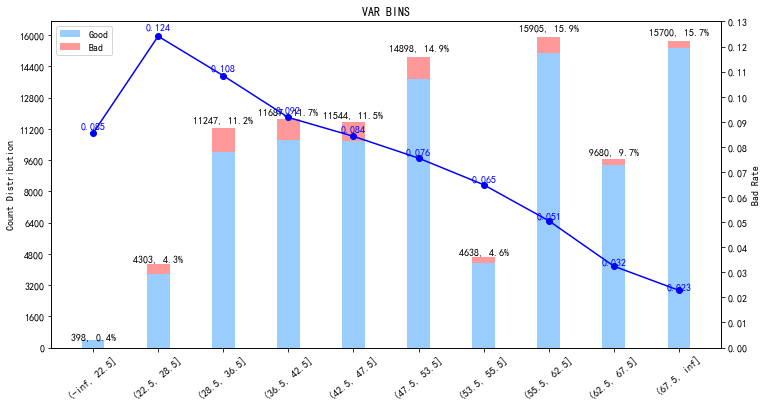

In [29]:
# ------------------------VAR BINS------------------------#
# 数据准备
bins = [-np.inf, 22.5, 28.5, 36.5, 42.5, 47.5, 53.5, 55.5, 62.5, 67.5, np.inf]
dt = train[["SeriousDlqin2yrs", "age"]].rename(
    columns={"age": "var", "SeriousDlqin2yrs": "y"}
)
# print(dt.shape)
# 数据处理
dt["bin"] = pd.cut(dt["var"], bins=bins)
dt = (
    dt.groupby("bin")["y"]
    .agg([("total", "count"), ("bad", "sum"), ("bad_rate", "mean")])
    .reset_index(drop=False)
)
dt["bad_rate"] = dt["bad_rate"].astype("float")
dt["good"] = dt["total"] - dt["bad"]
dt["total_pct"] = dt["total"] / dt["total"].sum()
dt["bad_pct"] = dt["bad"] / dt["bad"].sum()
dt["good_pct"] = dt["good"] / dt["good"].sum()
dt["woe"] = np.log(dt["bad_pct"] / dt["good_pct"])
dt["iv"] = (dt["bad_pct"] - dt["good_pct"]) * dt["woe"]
# print(dt.shape)
# 绘图
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title("VAR BINS")
ax1.set_xticks(dt.index)
ax1.set_xticklabels(labels=dt["bin"], rotation=40)
ax1.bar(x=dt.index, height=dt["good"], width=0.35, color="#99CCFF", alpha=1)
ax1.bar(
    x=dt.index,
    height=dt["bad"],
    width=0.35,
    bottom=dt["good"],
    color="#FF9999",
    alpha=1,
)
for x1, (y1, y2) in enumerate(zip(dt["total"], dt["total_pct"])):
    ax1.text(x=x1, y=y1 * 1.02, s="%s, %.1f%%" % (y1, y2 * 100), ha="center")
ax1.set_yticks(
    np.arange(
        start=0,
        stop=dt["total"].max() * 1.011,
        step=round(dt["total"].max() / 1000) * 100,
    )
)
ax1.set_ylabel("Count Distribution")
ax1.legend(["Good", "Bad"])
ax2 = ax1.twinx()
ax2.plot(dt.index, dt["bad_rate"], marker="o", color="blue")
for x1, y1 in enumerate(dt["bad_rate"]):
    ax2.text(x=x1, y=y1 * 1.02, s="%.3f" % y1, color="blue", ha="center")
ax2.set_yticks(np.arange(0, round(dt["bad_rate"].max(), 2) + 0.02, 0.01))
ax2.set_ylabel("Bad Rate")
plt.show()

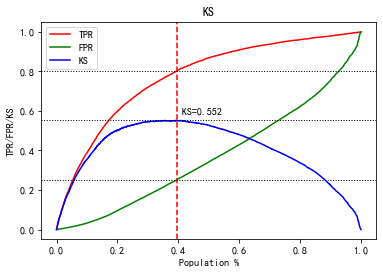

In [30]:
# ------------------------Model KS------------------------#
# 数据准备
dt = pd.DataFrame({"TPR": tpr, "FPR": fpr})
dt["KS"] = dt["TPR"] - dt["FPR"]
dt.index = (dt.index + 1) / len(dt)
ks_value = dt["KS"].max()
ks_idx = dt["KS"].idxmax()
tpr_value = dt["TPR"].loc[ks_idx]
fpr_value = dt["FPR"].loc[ks_idx]
# 开始绘图
ax = dt.plot(color=["red", "green", "blue"])
ax.set_title("KS")
ax.axvline(ks_idx, color="red", linestyle="--")
ax.axhline(ks_value, color="black", linestyle=":", linewidth=1)
ax.axhline(tpr_value, color="black", linestyle=":", linewidth=1)
ax.axhline(fpr_value, color="black", linestyle=":", linewidth=1)
ax.text(ks_idx, ks_value + 0.03, " KS=%.3f" % ks_value)
ax.set_xlabel("Population %")
ax.set_ylabel("TPR/FPR/KS")
plt.show()

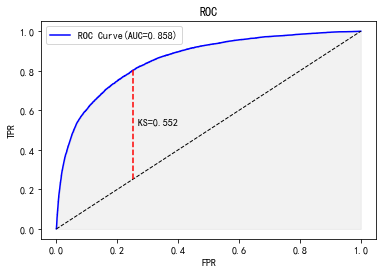

In [31]:
# ------------------------Model ROC------------------------#
# 数据准备
auc_score = auc(fpr, tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
# 开始绘图
fig, ax = plt.subplots()
ax.plot(fpr, tpr, "-b", label="ROC Curve(AUC=%.3f)" % auc_score)
ax.fill_between(fpr, tpr, color="gray", alpha=0.1)
ax.plot([0, 1], [0, 1], "--k", linewidth=1)
ax.plot([ks_x, ks_x], [ks_x, ks_y], "--r")
ax.text(ks_x, (ks_x + ks_y) / 2, " KS=%.3f" % ks_score)
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC")
plt.show()

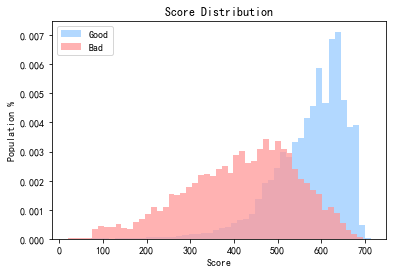

In [32]:
# ------------------------Model Score Distribution------------------------#
# 数据准备
train_pred_y = model.predict_proba(train_woe.drop(columns="SeriousDlqin2yrs"))[:, 1]
train_score = 300 - 80 * np.log(train_pred_y / (1 - train_pred_y))
bad_score = train_score[train_woe["SeriousDlqin2yrs"] == 1]
good_score = train_score[train_woe["SeriousDlqin2yrs"] == 0]
# 绘图
fig, ax = plt.subplots()
ax.hist(
    good_score,
    bins=50,
    density=True,
    alpha=0.75,
    label="Good",
    color="#99CCFF",
    cumulative=False,
)
ax.hist(
    bad_score,
    bins=50,
    density=True,
    alpha=0.75,
    label="Bad",
    color="#FF9999",
    cumulative=False,
)
ax.set_title("Score Distribution")
ax.set_xlabel("Score")
ax.set_ylabel("Population %")
ax.legend()
plt.show()

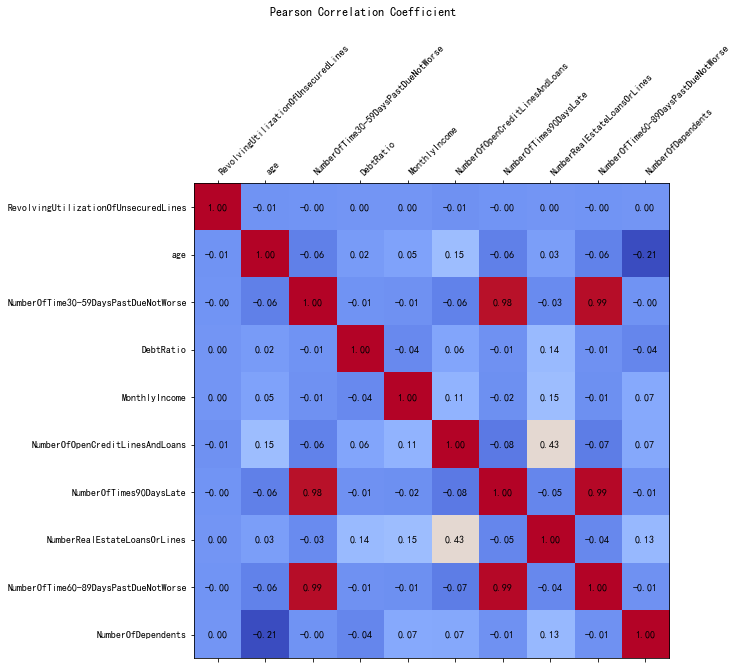

In [33]:
# ------------------------Model Features Correlation------------------------#
# 数据准备
dt = train.drop(columns="SeriousDlqin2yrs").corr()
vars = dt.columns.tolist()
# 绘图
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(dt, cmap="coolwarm")  # imshow
ticks = np.arange(len(vars))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(vars, rotation=45, ha="left")
ax.set_yticklabels(vars)
for i, v1 in enumerate(vars):
    for j, v2 in enumerate(vars):
        ax.text(i, j, "%.2f" % dt.loc[v1, v2], ha="center", va="center", color="black")
fig.suptitle("Pearson Correlation Coefficient")
fig.tight_layout()
plt.show()